In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Web Scraping
! pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google_play_scraper import Sort, reviews_all

In [4]:
result = reviews_all(
    'com.amazon.mShop.android.shopping',
    sleep_milliseconds=0.010, # defaults to 0
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    filter_score_with= None # defaults to None(means all score)
)

result = pd.DataFrame(result)

amazon_ps = pd.DataFrame()
amazon_ps['reviews']=result['content']
amazon_ps['score']= result['score']

In [5]:
## App Store Scraper

In [6]:
! pip install app-store-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 13.6 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled chardet-4.0.0
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests>=2.25.1, but you have requests 2.23.0 which is incompatible.


In [7]:
from app_store_scraper import AppStore

In [9]:
amazon = AppStore(country='us', app_name='amazon', app_id=297606951)
results = amazon.review(sleep=0.010)

results = pd.DataFrame(amazon.reviews)

amazon_as = pd.DataFrame()
amazon_as['reviews'] = results['review']
amazon_as['score'] = results['rating']

ERROR:Base:Something went wrong: HTTPSConnectionPool(host='amp-api.apps.apple.com', port=443): Max retries exceeded with url: /v1/catalog/us/apps/297606951/reviews?l=en-GB&offset=2000&limit=20&platform=web&additionalPlatforms=appletv%2Cipad%2Ciphone%2Cmac (Caused by ResponseError('too many 429 error responses'))


In [10]:
# PlayStore
print(' Play Store')
print("Amazon - ",amazon_ps.shape[0])

# Apple Store
print('\n','Apple store')
print("Amazon - ",amazon_as.shape[0])

 Play Store
Amazon -  113032

 Apple store
Amazon -  2000


In [11]:
# Append
df = amazon_ps.append(amazon_as)

In [12]:
print("Amazon - ",(f"{df.shape[0]:,}"))

Amazon -  115,032


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115032 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   reviews  115032 non-null  object
 1   score    115032 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.6+ MB


In [14]:
df.head(100)

,reviews,score
0,"N'ver mind, I'll just walk the 20 miles to the...",2
1,Amazon used to be the place for quick deliveri...,2
2,It's been a while since I've been using this a...,5
3,It's difficult to find what I'm looking for. T...,1
4,"Stale app. Sadly, does not support dark mode. ...",1
...,...,...
95,Has become impossible to search for items. Sea...,2
96,"For swiss People, it's almost impossible to se...",1
97,Super annoyed. Since the last update I cannot ...,2
98,I love using Amazon for Prime and other things...,1


In [15]:
df['score'].value_counts()

5    50368
1    38956
4     8866
2     8840
3     8002
Name: score, dtype: int64

In [16]:
def sentiment(df):
    df['sentiment']='-'
    df.loc[df['score']<=2,'sentiment']='negative'
    df.loc[df['score']==3,'sentiment']='neutral'
    df.loc[df['score']>=4,'sentiment']='positive'
    
    df = pd.get_dummies(df,columns=['sentiment']).reset_index(drop=True).drop(columns=['score'])
    return df

In [17]:
df = sentiment(df)

In [18]:
import re

In [19]:
TAG_RE = re.compile(r'<[^>]+>')

def re_tags(text_list): #define remove tag funtion
    return [TAG_RE.sub('', str(word)).lower() for word in text_list]

In [20]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 7.6 MB/s eta 0:00:00


In [21]:
import unidecode

In [22]:
def re_accented_char(text_list):
   
    return [unidecode.unidecode(word.encode().decode('utf-8')) for word in text_list]

In [23]:
def ex_contractions(text_list):
    result=[]
    for word in text_list:
        # replace contracting withoutsignal
        word = word.replace("wont","won't")
        word = word.replace("cant","can't")
        word = word.replace("its","it's")
        word = word.replace("youre","you're")
        word = word.replace("hes","he's")
        word = word.replace("shes","she's")
        word = word.replace("its","it's")
        word = word.replace("weare","we're")
        word = word.replace("theyre","they're")

        # specific
        word = re.sub(r"won\'t", "will not", str(word))
        word = re.sub(r"can\'t", "can not", str(word))

        # general
        word = re.sub(r"n\'t", " not", str(word))
        word = re.sub(r"\'re", " are", str(word))
        word = re.sub(r"\'s", " is", str(word))
        word = re.sub(r"\'d", " would", str(word))
        word = re.sub(r"\'ll", " will", str(word))
        word = re.sub(r"\'t", " not", str(word))
        word = re.sub(r"\'ve", " have", str(word))
        word = re.sub(r"\'m", " am", str(word))
        result.append(word)
    return result

In [24]:
def re_special_chars(text_list):
    return [re.sub("[^a-zA-Z0-9]"," ",word) for word in text_list]

In [25]:
from nltk.stem import WordNetLemmatizer 

In [26]:
def lemmatize_text(text_list):
    wnl = WordNetLemmatizer()
    lemmatizer_sentence = []  
    tokenizer=nltk.tokenize.WhitespaceTokenizer()
    for word in tokenizer.tokenize(text_list):
        lemmatizer_sentence.append(wnl.lemmatize(word,'v'))
        lemmatizer_sentence.append(" ")
    
    return("".join(lemmatizer_sentence))

In [27]:
import nltk

In [28]:
from nltk.corpus import stopwords

In [29]:
def stopwords_text(text_list):
    stop = stopwords.words('english')
    sentence_without = []
    tokenizer=nltk.tokenize.WhitespaceTokenizer()
    for word in tokenizer.tokenize(text_list):
        if word not in stop:
            sentence_without.append(word)
            sentence_without.append(" ")
            
    return("".join(sentence_without))

In [30]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [31]:
words=set(nltk.corpus.words.words())

def word_check(text_list):
    result=[]
    for word in text_list:
        if word.lower() in words:
            result.append(word)
    return result

In [32]:
def re_whitespaces(text_list): 
    result=[]
    for word in text_list:
        word=(re.sub(r'\d','dig',str(word))) #remove numbers 
        word = (re.sub(r'\s+',' ', str(word))) #remove duplicates white spacces
        result.append(word)
    return result

In [33]:
# Removing blank comments
df = df[df['reviews']!='']

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [35]:
# Class for regular expressions application
class ApplyRegex(BaseEstimator, TransformerMixin):
    
    def __init__(self, regex_transformers):
        self.regex_transformers = regex_transformers
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Applying all regex functions in the regex_transformers dictionary
        for regex_name, regex_function in self.regex_transformers.items():
            X = regex_function(X)
            
        return X

In [36]:
class StopWordsRemoval(BaseEstimator, TransformerMixin):
    
    def __init__(self, text_stopwords):
        self.text_stopwords = text_stopwords
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return [self.text_stopwords(comment) for comment in X]

In [37]:
class LemmatizeProcess(BaseEstimator, TransformerMixin):
    
    def __init__(self, Lemmatize):
        self.Lemmatizer = Lemmatize
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return [self.Lemmatizer(comment) for comment in X]
        

In [38]:
# Defining regex transformers to be applied
regex_transformers = {
    'remove_tags': re_tags,
    'remove_accents': re_accented_char,
    'decontracted': ex_contractions,
    're_sc': re_special_chars,
    'whitespaces': re_whitespaces
}

# Building a text prep pipeline
text_prep_pipeline = Pipeline([
    ('regex', ApplyRegex(regex_transformers)),
    ('stopwords', StopWordsRemoval(stopwords_text)),
    ('lemmatize', LemmatizeProcess(lemmatize_text)),
])





In [39]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [40]:
df['reviews'] = text_prep_pipeline.fit_transform(df[df.columns[:1]].values)

In [41]:
import plotly.express as px

In [42]:
total = pd.DataFrame(df[df.columns[1:]].sum()).rename(columns={0:'Total'})

In [43]:
fig = px.pie(total,values='Total',names=total.index)
plt.savefig("Pie_plot.png")

fig.show()

<Figure size 432x288 with 0 Axes>

In [44]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

In [45]:
pos_comments = list(df[df['sentiment_positive']==1]['reviews'].values)
positive_words = ' '.join(pos_comments).split(' ')
positive_words = pd.DataFrame(positive_words,columns=['words'])['words'].value_counts()[1:]

neu_comments = list(df[df['sentiment_neutral']==1]['reviews'].values)
neutral_words = ' '.join(neu_comments).split(' ')
neutral_words = pd.DataFrame(neutral_words,columns=['words'])['words'].value_counts()[1:]

neg_comments = list(df[df['sentiment_negative']==1]['reviews'].values)
negative_words = ' '.join(neg_comments).split(' ')
negative_words = pd.DataFrame(negative_words,columns=['words'])['words'].value_counts()[1:]

In [46]:
positive_wc = WordCloud(width=1280, height=720, collocations=False, random_state=42,
                      colormap='Blues', background_color='white', max_words=50)
positive_wc = positive_wc.generate_from_frequencies(positive_words)


neutral_wc = WordCloud(width=1280, height=720, collocations=False, random_state=42,
                          colormap='Greys', background_color='white', max_words=50)
neutral_wc = neutral_wc.generate_from_frequencies(neutral_words)


negative_wc = WordCloud(width=1280, height=720, collocations=False, random_state=42,
                          colormap='Reds_r', background_color='white', max_words=50)
negative_wc = negative_wc.generate_from_frequencies(negative_words)



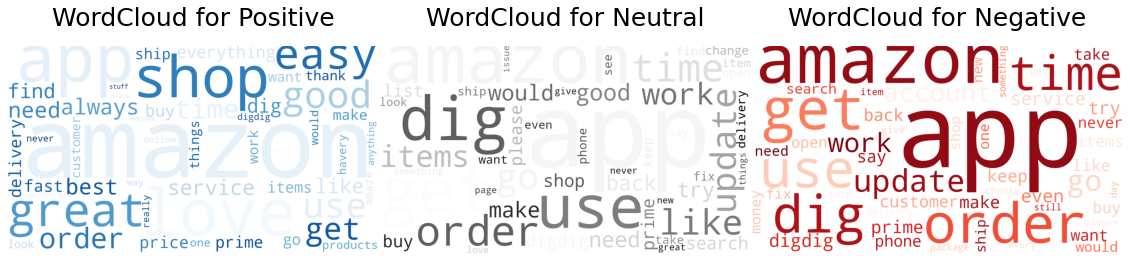

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(20, 20))

axs[0].set_title('WordCloud for Positive', size=25, pad=20)
axs[0].imshow(positive_wc)
axs[0].axis('off')

axs[1].set_title('WordCloud for Neutral', size=25, pad=20)
axs[1].imshow(neutral_wc)
axs[1].axis('off')

axs[2].set_title('WordCloud for Negative', size=25, pad=20)
axs[2].imshow(negative_wc)
axs[2].axis('off');

plt.savefig("WordCloud.jpg")


fig.subplots_adjust(hspace=1,wspace=0.0)


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [49]:
def ngram_results(df):
    
    df_1=df[df['sentiment_positive']==1]
    df_2=df[df['sentiment_neutral']==1]
    df_3=df[df['sentiment_negative']==1]
    
    
    def uni_bi_tri(df_pos,df_neu,df_neg):
        
        #pos
        word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_mono_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_bi_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tri_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        word_vectorizer = CountVectorizer(ngram_range=(4,4), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tetra_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
       
        #neu
        word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neu['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_mono_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neu['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_bi_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neu['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tri_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        word_vectorizer = CountVectorizer(ngram_range=(4,4), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neu['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tetra_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        #neg
        word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_mono_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_bi_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tri_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        word_vectorizer = CountVectorizer(ngram_range=(4,4), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tetra_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        results=[result_mono_pos,result_bi_pos,result_tri_pos,result_tetra_pos,
                 result_mono_neu,result_bi_neu,result_tri_neu,result_tetra_neu,
                 result_mono_neg,result_bi_neg,result_tri_neg,result_tetra_neg]
        
        return results
    

    
    return uni_bi_tri(df_1,df_2,df_3)



In [50]:
amazon_results = ngram_results(df)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [51]:
def rename_index(dflist):

    #pos
    df_mono_pos=pd.DataFrame(dflist[0]).reset_index().rename(columns={'index':'Mono_Pos'})
    df_bi_pos=pd.DataFrame(dflist[1]).reset_index().rename(columns={'index':'Bi_Pos'})
    df_tri_pos=pd.DataFrame(dflist[2]).reset_index().rename(columns={'index':'Tri_Pos'})
    df_tetra_pos=pd.DataFrame(dflist[3]).reset_index().rename(columns={'index':'Tetra_Pos'})
    #neu
    df_mono_neu=pd.DataFrame(dflist[4]).reset_index().rename(columns={'index':'Mono_Neu'})
    df_bi_neu=pd.DataFrame(dflist[5]).reset_index().rename(columns={'index':'Bi_Neu'})
    df_tri_neu=pd.DataFrame(dflist[6]).reset_index().rename(columns={'index':'Tri_Neu'})
    df_tetra_neu=pd.DataFrame(dflist[7]).reset_index().rename(columns={'index':'Tetra_Neu'})
    #neg
    df_mono_neg=pd.DataFrame(dflist[8]).reset_index().rename(columns={'index':'Mono_Pos'})
    df_bi_neg=pd.DataFrame(dflist[9]).reset_index().rename(columns={'index':'Bi_Pos'})
    df_tri_neg=pd.DataFrame(dflist[10]).reset_index().rename(columns={'index':'Tri_Pos'})
    df_tetra_neg=pd.DataFrame(dflist[11]).reset_index().rename(columns={'index':'Tetra_Neg'})
    
    result=[df_mono_pos, df_bi_pos, df_tri_pos, df_tetra_pos,
            df_mono_neu, df_bi_neu, df_tri_neu, df_tetra_neu,
            df_mono_neg, df_bi_neg, df_tri_neg, df_tetra_neg]
    
    return result

In [52]:
amazon_results=rename_index(amazon_results)

In [53]:
#for df in amazon_results:
fig = make_subplots(rows=3, cols=4,
                    vertical_spacing=0.15,
                    column_titles =['Mono-grams','Bi-grams','Tri-grams','Tetra-grams'],
                    row_titles =['Positive','Neutral','Negative'],                  
      
                   )
#for df in amazon_results:
fig.add_trace(go.Bar(
            x = amazon_results[0][amazon_results[0].columns[0]].head(),
            y = amazon_results[0][amazon_results[0].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=1)
fig.add_trace(go.Bar(
            x = amazon_results[1][amazon_results[1].columns[0]].head(),
            y = amazon_results[1][amazon_results[1].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=2)
fig.add_trace(go.Bar(
            x = amazon_results[2][amazon_results[2].columns[0]].head(),
            y = amazon_results[2][amazon_results[2].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=3)
    # neu
fig.add_trace(go.Bar(
            x = amazon_results[3][amazon_results[3].columns[0]].head(),
            y = amazon_results[3][amazon_results[3].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=4)
fig.add_trace(go.Bar(
            x = amazon_results[4][amazon_results[4].columns[0]].head(),
            y = amazon_results[4][amazon_results[4].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=1)
fig.add_trace(go.Bar(
            x = amazon_results[5][amazon_results[5].columns[0]].head(),
            y = amazon_results[5][amazon_results[5].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=2)
    # neg
fig.add_trace(go.Bar(
            x = amazon_results[6][amazon_results[6].columns[0]].head(),
            y = amazon_results[6][amazon_results[6].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=3)
fig.add_trace(go.Bar(
            x = amazon_results[7][amazon_results[7].columns[0]].head(),
            y = amazon_results[7][amazon_results[7].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=4)
fig.add_trace(go.Bar(
            x = amazon_results[8][amazon_results[8].columns[0]].head(),
            y = amazon_results[8][amazon_results[8].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=1)
fig.add_trace(go.Bar(
            x = amazon_results[9][amazon_results[9].columns[0]].head(),
            y = amazon_results[9][amazon_results[9].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=2)
fig.add_trace(go.Bar(
            x = amazon_results[10][amazon_results[10].columns[0]].head(),
            y = amazon_results[10][amazon_results[10].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=3)
fig.add_trace(go.Bar(
            x = amazon_results[11][amazon_results[11].columns[0]].head(),
            y = amazon_results[11][amazon_results[11].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=4)


    
#
fig.update_layout({"showlegend": False},height=900, width=1000)
plt.savefig("N_Gram.png")

fig.show()

<Figure size 432x288 with 0 Axes>

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
y =  df[df.columns[1:]].values

In [56]:
X = []

sentences = list(df["reviews"])
for sen in sentences:
    X.append(sen)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [58]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [59]:
# Defining the num of words
tokenizer = Tokenizer(num_words=5000)
# Fighting in the X df
tokenizer.fit_on_texts(X)

# Tokenizing Train and test

X_prep = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

# Setting the max length of features

maxlen = 200

# Ensuring the all sequences have the same length
X_train = pad_sequences(X_prep, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [60]:
from numpy import array
from numpy import asarray
from numpy import zeros

In [61]:
embeddings_dictionary = dict()

glove_file = open('/content/drive/MyDrive/ML /amazon_app.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [62]:
print('Negative',pd.DataFrame(y_train).sum()[0])
print('Neutral',pd.DataFrame(y_train).sum()[1])
print('Positve',pd.DataFrame(y_train).sum()[2])

Negative 38175
Neutral 6456
Positve 47394


In [63]:
from imblearn.over_sampling import RandomOverSampler

In [64]:
over = RandomOverSampler()
    
X_ov, y_ov = over.fit_resample(X_train, y_train)

In [65]:
print('Negative',pd.DataFrame(y_ov).sum()[0])
print('Neutral',pd.DataFrame(y_ov).sum()[1])
print('Positve',pd.DataFrame(y_ov).sum()[2])


Negative 47394
Neutral 47394
Positve 47394


In [66]:
from sklearn.feature_selection import f_classif, SelectKBest

In [67]:
selected_features = [] 
for label in range(0,3):
    selector = SelectKBest(f_classif, k='all')
    selector.fit(X_ov, pd.DataFrame(y_ov)[label])
    selected_features.append(list(selector.scores_))

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [186 187 188 189 190 191 192 193 194 195 196 197 198 199] are constant.

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [186 187 188 189 190 191 192 193 194 195 196 197 198 199] are constant.

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [186 187 188 189 190 191 192 193 194 195 196 197 198 199] are constant.

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid

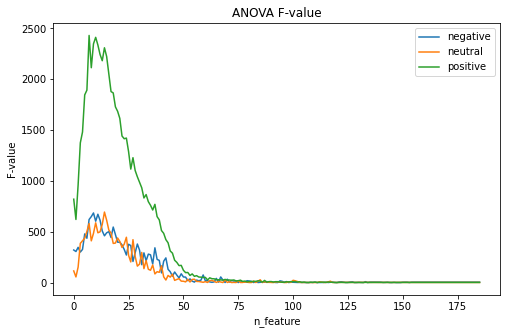

In [68]:
plt.figure(figsize=(8, 5))
plt.plot(selected_features[0])
plt.plot(selected_features[1])
plt.plot(selected_features[2])

plt.title('ANOVA F-value')
plt.ylabel('F-value')
plt.xlabel('n_feature')
plt.legend(['negative','neutral','positive'], loc='upper right')


plt.show()

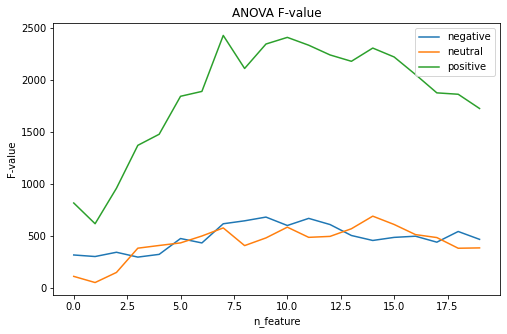

In [69]:
plt.figure(figsize=(8, 5))
plt.plot(pd.DataFrame(selected_features).T[:20][0])
plt.plot(pd.DataFrame(selected_features).T[:20][1])
plt.plot(pd.DataFrame(selected_features).T[:20][2])

plt.title('ANOVA F-value')
plt.ylabel('F-value')
plt.xlabel('n_feature')
plt.legend(['negative','neutral','positive'], loc='upper right')

plt.show()

In [70]:
X_ov=X_ov[:,:20]

In [71]:
from tensorflow.keras import backend as K

In [72]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


In [73]:

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [74]:
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [75]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding

In [76]:
deep_inputs = Input(shape=(20,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(3, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])

In [77]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 embedding (Embedding)       (None, 20, 100)           3204800   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 3,322,435
Trainable params: 117,635
Non-trainable params: 3,204,800
_________________________________________________________________
None


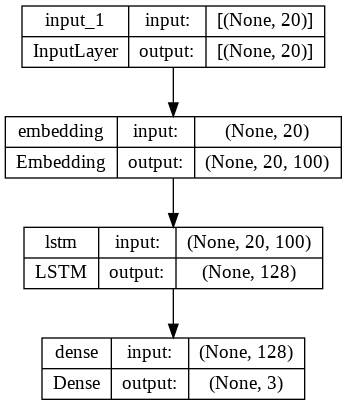

In [78]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [79]:
history = model.fit(X_ov, y_ov, batch_size=32, epochs=15, verbose=1, validation_split=0.3)

Epoch 1/15
3111/3111 [==============================] - 127s 40ms/step - loss: 0.3107 - acc: 0.8127 - f1_m: 0.8090 - precision_m: 0.8302 - recall_m: 0.7899 - val_loss: 1.1917 - val_acc: 0.0354 - val_f1_m: 0.0348 - val_precision_m: 0.0360 - val_recall_m: 0.0337
Epoch 2/15
3111/3111 [==============================] - 118s 38ms/step - loss: 0.2764 - acc: 0.8360 - f1_m: 0.8339 - precision_m: 0.8552 - recall_m: 0.8144 - val_loss: 1.3790 - val_acc: 0.0376 - val_f1_m: 0.0358 - val_precision_m: 0.0365 - val_recall_m: 0.0352
Epoch 3/15
3111/3111 [==============================] - 114s 37ms/step - loss: 0.2631 - acc: 0.8448 - f1_m: 0.8430 - precision_m: 0.8645 - recall_m: 0.8232 - val_loss: 1.3378 - val_acc: 0.0372 - val_f1_m: 0.0349 - val_precision_m: 0.0357 - val_recall_m: 0.0343
Epoch 4/15
3111/3111 [==============================] - 118s 38ms/step - loss: 0.2529 - acc: 0.8508 - f1_m: 0.8487 - precision_m: 0.8703 - recall_m: 0.8288 - val_loss: 1.1972 - val_acc: 0.0776 - val_f1_m: 0.0472 - val

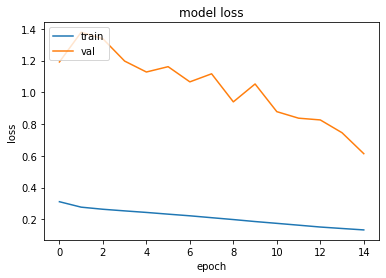

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.savefig("Model_loss.jpg")

plt.show()

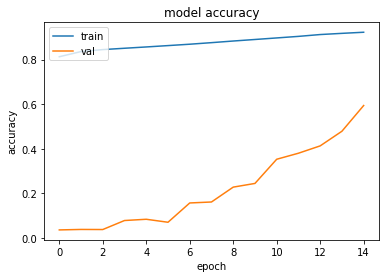

In [81]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.savefig("Model_Accuracy.jpg")

plt.show()



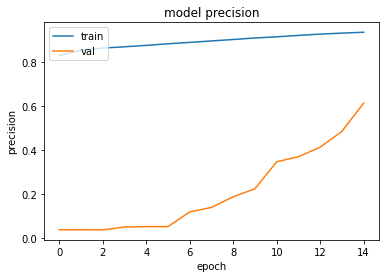

In [82]:
plt.plot(history.history['precision_m'])
plt.plot(history.history['val_precision_m'])

plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.savefig("Model_Precision.jpg")

plt.show()


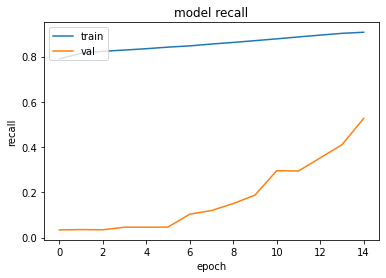

In [83]:
plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])

plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.savefig("Model_Recall.jpg")

plt.show()


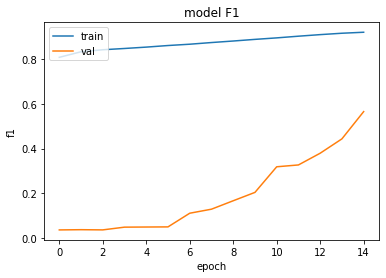

In [84]:
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])

plt.title('model F1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.savefig("Model_F1.jpg")

plt.show()


In [85]:
score_train = model.evaluate(X_ov[:,:20], y_ov, verbose=1)
score_test = model.evaluate(X_test[:,:20], y_test, verbose=1)

719/719 [==============================] - 10s 13ms/step - loss: 0.3901 - acc: 0.8085 - f1_m: 0.8064 - precision_m: 0.8262 - recall_m: 0.7882


In [86]:
score = pd.DataFrame({'Loss':[score_train[0],score_test[0]],
             'Accuracy':[score_train[1],score_test[1]],
             'Precision':[score_train[3],score_test[3]],
             'Recall':[score_train[4],score_test[4]],
             'F1-Score':[score_train[2],score_test[2]]
                     },
             index=['Train Score','Test Score'])

score

,Loss,Accuracy,Precision,Recall,F1-Score
Train Score,0.265648,0.833052,0.848151,0.802158,0.823414
Test Score,0.390132,0.808537,0.826176,0.788155,0.806356


In [87]:
def sentiment_analysis(text, pipeline, model):
    
    # Applying the pipeline
    if type(text) is not list:
        text = [text]
        text_prep = text_prep_pipeline.fit_transform(text)
        text_prep = tokenizer.texts_to_sequences(text_prep)
        matrix = pad_sequences(text_prep, padding='post', maxlen=20)
        # Predicting sentiment
        proba = model.predict(matrix)
    
    
    # Plotting the sentiment and its score
    fig, ax = plt.subplots(figsize=(5, 3))
    
    if proba.argmax() == 0 :
        text = 'Negative'
        class_proba = int(proba[0][0].round(2)*100)
        color = 'Crimson'
        
    elif proba.argmax() == 1 :
        text = 'Neutral'
        class_proba = int(proba[0][1].round(2)*100) 
        color = 'Lightgrey'
       
    elif proba.argmax() == 2 :
        text = 'Positive'
        class_proba = int(proba[0][2].round(2)*100) 
        color = 'DeepSkyBlue'
        
    ax.text(0.5, 0.5, text, fontsize=50, ha='center', color=color)
    ax.text(0.5, 0.20, str(class_proba) + '%', fontsize=14, ha='center')
    ax.axis('off')
    ax.set_title('Sentiment Analysis', fontsize=14)
    plt.show()
    

In [88]:
#Positive

comment = "The prices are amazing and the shipping is really fast! Thank for everything amazon!"

1/1 [==============================] - 1s 554ms/step


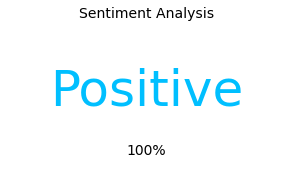

In [89]:
sentiment_analysis(comment, pipeline=text_prep_pipeline,  model=model)

In [90]:
#Positive

comment1 = "the delivery very good as compared to other. Thank for everything amazon!"

1/1 [==============================] - 0s 24ms/step


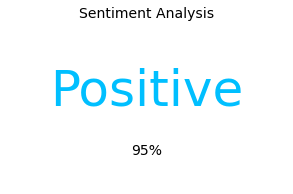

In [91]:
sentiment_analysis(comment1, pipeline=text_prep_pipeline,  model=model)

In [92]:
# Negative

comment = "I lost my money. I contact the custom service and they tell to wait receive item but not received yet"

1/1 [==============================] - 0s 21ms/step


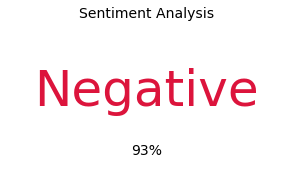

In [93]:
sentiment_analysis(comment, pipeline=text_prep_pipeline, model=model)

In [94]:
# Neutral
comment = "Overall app is ok. But i really want some improvements in the next update."

1/1 [==============================] - 0s 23ms/step


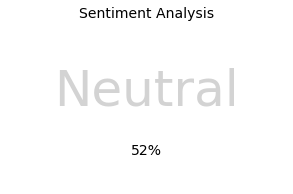

In [95]:
sentiment_analysis(text=comment, pipeline=text_prep_pipeline, model=model)

In [96]:
comment_3 ="stale app sadly support dark mode search poor show many irrelevant result order history shorten dig months complete history full history scroll helpful find items order see items purchase warranty filter year cannot remember year much difficult search less useful freeze sometimes december digdigdigdig improvements"

1/1 [==============================] - 0s 25ms/step


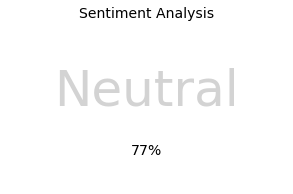

In [97]:
sentiment_analysis(text=comment_3, pipeline=text_prep_pipeline, model=model)

In [98]:
df.head(200)

,reviews,sentiment_negative,sentiment_neutral,sentiment_positive
0,n haver mind walk digdig miles nearest amazon ...,1,0,0
1,amazon use place quick deliveries deal constan...,1,0,0
2,since use app compare website pretty much good...,0,0,1
3,difficult find look many unrelated result filt...,1,0,0
4,stale app sadly support dark mode search poor ...,1,0,0
...,...,...,...,...
195,nothe app work well except fact somehow even t...,0,1,0
196,reason get app locker need access require use ...,1,0,0
197,use app purchase items order history real shop...,1,0,0
198,slow cumbersome ui hide important information ...,1,0,0


In [99]:
comment_4 ="	new update make worse could see item ship look order click individual order see ship status also items deliver use highlight different color go top list order randomly black green particular reason list date order process items appear already deliver"

1/1 [==============================] - 0s 22ms/step


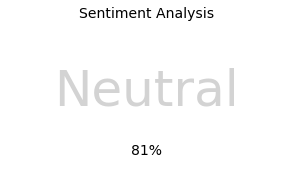

In [100]:
sentiment_analysis(text=comment_4, pipeline=text_prep_pipeline, model=model)

In [101]:
comment_5 = "love amazon prime amazon sell everything recently open depot near mean deliver products lot better third party never problem amazon	"

In [ ]:
sentiment_analysis(text=comment_5, pipeline=text_prep_pipeline, model=model)

In [ ]:
comment_6 = "i love amazon product ,the service of amazon delivery is very good"

In [ ]:
sentiment_analysis(text=comment_6, pipeline=text_prep_pipeline, model=model)

In [ ]:
comment_7 = "the product which i get not as much good so i can cancelled the ordered"

In [ ]:
sentiment_analysis(text=comment_7, pipeline=text_prep_pipeline, model=model)

In [ ]:
comment_8 = "last friday buy clean supply less digdig hours item ship get random message reason item return seller clean supple make state without even explanation today tuesday im still wait money back never shop amazon neither wife	"

In [ ]:
sentiment_analysis(text=comment_8, pipeline=text_prep_pipeline, model=model)

In [ ]:
comment_9 = "find almost anything want need price sometimes better w vendor problems usually resolve amazon asap amazon good delvery date options dig rebate prime card want buy item alexa refund exchange easy get esp prime card amazon help vendor always get refund items replace use card amazon fresh imo amazon may best source everybody complaints	"

In [ ]:
sentiment_analysis(text=comment_9, pipeline=text_prep_pipeline, model=model)

In [ ]:
comment_10 = "Delivery Delayed by three Days"

In [ ]:
sentiment_analysis(text=comment_10, pipeline=text_prep_pipeline, model=model)

In [ ]:
comment_11 = "Service are very good"

In [ ]:
sentiment_analysis(text=comment_11, pipeline=text_prep_pipeline, model=model)

In [ ]:
comment_12 = "Service is Average  but improve your Product Services"

In [ ]:
sentiment_analysis(text=comment_12, pipeline=text_prep_pipeline, model=model)

In [ ]:
comment_13 ="Found 20 empty capsules and 16 half filled capsules in the bottle. Opened lil late so not able to return."

In [ ]:
sentiment_analysis(text=comment_13, pipeline=text_prep_pipeline, model=model)

In [ ]:
comment_14 = "I have been ordering this for three years now and am satisfied with the quality of the Spirulina and the price of course is the best I have seen in the market"

In [ ]:
sentiment_analysis(text=comment_14, pipeline=text_prep_pipeline, model=model)

In [ ]:
comment_15 = "I've been looking for this, and was considering building something similar myself, but I'm happy to see it executed so beautifully. Amazon shopping will never be the same and I'm excited to see where this goes. Maybe one day we'll see a pollution price tag on every product."

In [ ]:
sentiment_analysis(text=comment_15, pipeline=text_prep_pipeline, model=model)

In [ ]:
comment_16 ="Tablets are not of good quality. light green in color and no spirulina smell. where the good quality once are in dark green color and give a different smell"

In [ ]:
sentiment_analysis(text=comment_16, pipeline=text_prep_pipeline, model=model)

In [ ]:
comment_17 ="improvement required in service department"

In [ ]:
sentiment_analysis(text=comment_17, pipeline=text_prep_pipeline, model=model)

In [ ]:
comment_18 ="My Experience so far has benn Fantastic "

In [ ]:
sentiment_analysis(text=comment_18, pipeline=text_prep_pipeline, model=model)

In [ ]:
comment_19 ="the product is ok i guess but it required some improvement"

In [ ]:
sentiment_analysis(text=comment_19, pipeline=text_prep_pipeline, model=model)

In [ ]:
comment_20 = "Your support team is useless"

In [ ]:
sentiment_analysis(text=comment_20, pipeline=text_prep_pipeline, model=model)

In [102]:
comment_21 ="the product is useless"

1/1 [==============================] - 0s 31ms/step


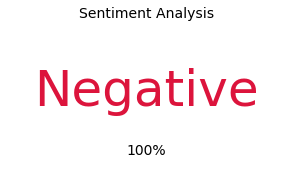

In [103]:
sentiment_analysis(text=comment_21, pipeline=text_prep_pipeline, model=model)

In [114]:
comment_22="the product is very neither good , bad"

1/1 [==============================] - 0s 18ms/step


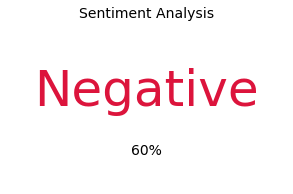

In [115]:
sentiment_analysis(text=comment_22, pipeline=text_prep_pipeline, model=model)